In [8]:
import glob
import numpy as np
import os.path
from scipy import stats
import math
from math import sqrt,pi
import matplotlib.pyplot as plt
import mpmath as mp
%matplotlib inline
from scipy import special
mydehoog = mp.calculus.inverselaplace.deHoog(mp)

L=5
f=1.0208582

def calk(stsim,t,C): #get kt from st
    dst = (stsim[2:]-stsim[:-2])/(t[2:]-t[:-2])
    dst=np.append((stsim[1]-stsim[0])/(t[1]-t[0]),dst)
    dst=np.append(dst,(stsim[-1]-stsim[-2])/(t[-1]-t[-2])  )
    return -dst/stsim/C

def funclt(t,C1,C2,D): #continuum kt at long time
    #C1=R=2*rm,C2=ka
    g = 0.577216
    b1=4*D/C2/C2
    A=np.log(b1*t)+4*pi*D/C1-2*g
    return 4*pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3+0.25/A**4)

/home/chew/spatiocyte_example/2D/output/oriPa_2D_irr_kf0.01N423L6.5/*
423.0 20000 0.200614156917643 6690848.0
(153,)
/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf0.01_N423_L6.5_50tm_meanst_periodic_p0
423.0 20000 0.200614156917643 6692299.0
(153,)
/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf0.01_N423_L6.5_50tm_meanst_periodic_p1
423.0 20000 0.200614156917643 6692401.0
(153,)
/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf0.01_N423_L6.5_50tm_meanst_periodic_p2
423.0 20000 0.200614156917643 6693253.0
(153,)
/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf0.01_N423_L6.5_50tm_meanst_periodic_p3
423.0 20000 0.200614156917643 6691215.0
(153,)
/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf0.01_N423_L6.5_50tm_meanst_periodic_p4
423.0 20000 0.200614156917643 6692777.0
(153,)
/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf0.01_N423_L6.5_50tm_meanst_periodic_p5
423.0 20000 0.200614156917643 6693444.0
(153,)
/home/chew/spatiocyte_example/2D/split/ec3_

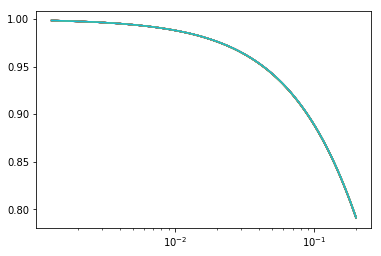

In [2]:
for pad in ['ori','new']:
    kf=0.01
    N=423
    pattern = '/home/chew/spatiocyte_example/2D/output/{}Pa_2D_irr_kf{}N{}L6.5/*'.format(pad,kf,N)
    FNS = glob.glob(pattern)#[:40000]
    print(pattern)
    split=10
    sz = int(len(FNS)/split)
    for j in range(split):
        fns = FNS[(j)*sz:sz*(1+j)]
        ss=[]
        cnter = 0
        for fn in fns:
            t,nt=np.array(np.loadtxt(fn,delimiter=',',skiprows=1)).T
            N0 = nt[0]    
            nt=nt[1:-1]
            #s=nt/float(N0)   
            if len(ss)==0:
                ss = nt
            else: ss+=nt
            cnter+=1
        print(N0,cnter,t[-1],ss[-1])
        t=t[1:-1]
        print(np.array(ss).shape)
        s = ss/float(cnter)/float(N0)
        std=np.std(np.array(ss),axis=0)/N0
        name='/home/chew/spatiocyte_example/2D/split/ec3_{}Pa_simkf{}_N{}_L6.5_50tm_meanst_periodic_p{}'.format(pad,kf,N,j)
        print(name)
        plt.semilogx(t,s,'-')
        #plt.errorbar(t,s,std)
        plt.xscale('log')
        #plt.yscale('log')
        filename=open(name,'w')
        np.savetxt(name,[t,s],delimiter=',',fmt='%s')
        filename.close()        




/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_p0
/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_p1
/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_p2
/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_p3
/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_p4
/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_p5
/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_p6
/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_p7
/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_p8
/home/chew/spatiocyte_example/2D/split/ec3_oriPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_p9
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100.0_

(1.4, 2)

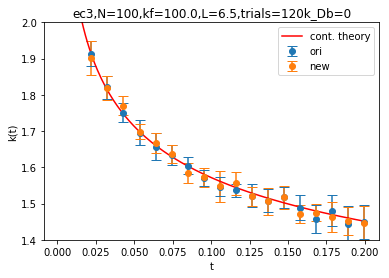

In [12]:
kf=100.0
N=100#N=423
Area = 42.247
R=0.01
D=1
ka=kf*D*4*pi
lg=8

for pad in ['ori','new']:
    KT=[]
    for j in range(split):
        name='/home/chew/spatiocyte_example/2D/split/ec3_{}Pa_simkf{}_N{}_L6.5_50tm_meanst_periodic_p{}'.format(pad,kf,N,j)
        print(name)
        t,st = np.loadtxt(name,delimiter=',')
        kt = calk(st,t,N/Area)
        KT.append(kt)
        #plt.plot(t,kt,'.')
    KT=np.array(KT)    
    mkt = np.mean(KT,axis=0)
    std = np.std(KT,axis=0)
    plt.errorbar(t[::lg],mkt[::lg],std[::lg],fmt='o',capsize=5,label=pad)

plt.plot(t,funclt(t,ka,R,D),'r-',label='cont. theory')
plt.legend()
plt.ylabel('k(t)')
plt.xlabel('t')
#plt.title('ec3,N={},kf={},L={},trials={}k'.format(423,0.01,6.5,200))
plt.title('ec3,N={},kf={},L={},trials={}k_Db=0'.format(N,kf,6.5,120))
plt.ylim(1.4,2)

In [ ]:
#names = ['/home/chew/spatiocyte_example/2D/ec3_oriPa_simkf100_N100_L6.5_50tm_meanst_periodic',
#'/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_periodic']
names = ['/home/chew/spatiocyte_example/2D/ec3_oriPa_simkf100.0_N100_L6.5_50tm_meanst_periodic',
        '/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100.0_N100_L6.5_50tm_meanst_periodic']
labels = ['ec3_oriPa','ec3_newPa']
fig,ax=plt.subplots(1,2,figsize=(17,6))
ST=[]
N=100
Area = 42.247
Tth,kth = np.loadtxt('/home/chew/outputdata/keff/2D/kt_kf100N100A42_247.csv',delimiter=',').T
ax[0].plot(Tth[:153],kth[:153],'r-',label='exact')
kaf=100
R=0.01
D=1
ka=kaf*D*4*pi

Dif = []
for i,name in enumerate(names):
    t,st = np.loadtxt(name,delimiter=',')
    #if i==1:
    #    t=t[:153]
    #    st=st[:153]
    t=t[::2]
    st=st[::2]
    #ST.append(st[:31])
    kt = calk(st,t,N/Area)
    #kt=plotg(N,Area,t,st,'{}_conc{:.3f}'.format(labels[i],N/Area))
    #print(max(t-Tth[:153]))
    #idt = t>0.1
    kth = funclt(t,ka,R,D)
    dif = abs(kt-kth)#*100/kt
    Dif.append(dif)
    ax[0].plot(t,kt,label=labels[i])

ax[0].set_xlim(0.05,0.2)
ax[0].set_ylim(1.4,1.8)
ax[0].set_ylabel('kt')
ax[0].set_xlabel('t')
ax[1].plot(t,Dif[0],'r-')
ax[1].plot(t,Dif[1],'g-')
ax[1].set_ylim(-0.02,0.02)
ax[1].set_xlabel('t')
ax[1].set_ylabel('difference compared to cont. theory, %')
ax[0].set_title('kf100,L=6.5,N=100,ec3_offlattice,simrun=40k')
ax[0].semilogx(t,funclt(t,ka,R,D),'c--',label='approx theory')
#plt.xlim(0.05,0.2)
#plt.ylim(0.4,0.8)
#plt.semilogx(t,func(t,ka,R,D),'c--',label='approx theory')
ax[0].legend()

In [43]:
folders=['/home/chew/spatiocyte_example/2D/output/newPa_2D_irr_kf100.0N100L6.5/*',
        '/home/chew/spatiocyte_example/2D/output/newPa_2D_irr_kf100.0N100L6.5_Da0/*']
kf=100
N=100
pad='new'
names=['Da1Db0','Da0Db1']
out=[]
split=20
for k,pattern in enumerate(folders):
    name=names[k]
    FNS = glob.glob(pattern)[:80000]
    print(pattern)
    
    sz = int(len(FNS)/split)
    print('sample size',sz)
    stmean=[]
    for j in range(split):
        fns = FNS[(j)*sz:sz*(1+j)]
        ss=[]
        cnter = 0
        for fn in fns:
            t,nt=np.array(np.loadtxt(fn,delimiter=',',skiprows=1)).T
            N0 = nt[0]    
            nt=nt[1:-1]
            #s=nt/float(N0)   
            if len(ss)==0:
                ss = nt
            else: ss+=nt
            cnter+=1
        print('N0={}iteration={}tlast={},Stlast={}'.format(N0,cnter,t[-1],ss[-1]))
        t=t[1:-1]
        #print(np.array(ss).shape)
        s = ss/float(cnter)/float(N0)
        stmean.append(s)
        fname='/home/chew/spatiocyte_example/2D/split/ec3_{}Pa_simkf{}_N{}_L6.5_50tm_meanst_{}_p{}'.format(pad,kf,N,name,j)
        print(fname)
        #plt.semilogx(t,s,'-')
        #plt.errorbar(t,s,std)
        #plt.xscale('log')
        #plt.yscale('log')
        filename=open(fname,'w')
        np.savetxt(fname,[t,s],delimiter=',',fmt='%s')
        filename.close()    
    stmean=np.array(stmean)
    out.append([t,stmean])

/home/chew/spatiocyte_example/2D/output/newPa_2D_irr_kf100.0N100L6.5/*
sample size 4000
N0=100.0iteration=4000tlast=0.200614156917643,Stlast=182132.0
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p0
N0=100.0iteration=4000tlast=0.200614156917643,Stlast=182749.0
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p1
N0=100.0iteration=4000tlast=0.200614156917643,Stlast=182788.0
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p2
N0=100.0iteration=4000tlast=0.200614156917643,Stlast=182376.0
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p3
N0=100.0iteration=4000tlast=0.200614156917643,Stlast=182178.0
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p4
N0=100.0iteration=4000tlast=0.200614156917643,Stlast=182349.0
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p5


In [1]:
ds=2
i=0
for t,stmean in out:
    print(np.std(stmean,axis=0)[::ds][-1])
    plt.errorbar(t[::ds],np.mean(stmean,axis=0)[::ds],np.std(stmean,axis=0)[::ds],label=i,capsize=5)
    i+=1
plt.legend()
plt.ylim(0.45,0.6)
plt.xlim(0.125,0.2)

NameError: name 'out' is not defined

2.0422724563012373

/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p0
0.45533
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p1
0.4568725
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p2
0.45697000000000004
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p3
0.45594
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p4
0.455445
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p5
0.45587249999999996
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p6
0.45515
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p7
0.4570025
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p8
0.455785
/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_Da1Db0_p

(1.4, 2)

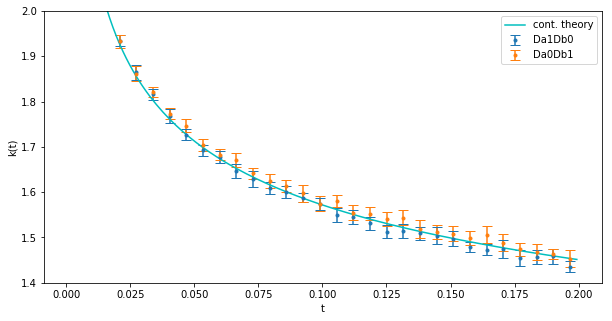

In [16]:
plt.figure(figsize=(10,5))
names=['Da1Db0','Da0Db1']
N=100
split=20
kf=100
Area=42.247
lg=5
R=0.01
D=1
ka=kf*D*4*pi
lastkt=[[],[]]

for ii,nm in enumerate(names):
    KT=[]
    for j in range(split):
        name='/home/chew/spatiocyte_example/2D/split/ec3_newPa_simkf100_N100_L6.5_50tm_meanst_{}_p{}'.format(nm,j)
        print(name)
        t,st = np.loadtxt(name,delimiter=',')
        print(st[-1])
        kt = calk(st,t,N/Area)
        KT.append(kt)
        #plt.plot(t,kt,'.')
        lastkt[ii].append(kt[-3])
    KT=np.array(KT)    
    mkt = np.mean(KT,axis=0)
    print(KT.shape)
    tscore = stats.t.ppf(1-0.025, 30)#Studnt, p<0.05, 2-tail
    std = np.std(KT,axis=0)*tscore/math.sqrt(split-1)#check correct or not? P=0.05
    plt.errorbar(t[::lg],mkt[::lg],std[::lg],fmt='.',capsize=5,label=nm)
plt.plot(t,funclt(t,ka,R,D),'c-',label='cont. theory')
plt.legend()
plt.ylabel('k(t)')
plt.xlabel('t')
#plt.title('ec3,N={},kf={},L={},trials={}k'.format(423,0.01,6.5,200))
#plt.title('ec3,N={},kf={},L={},trials={}k_Db=0'.format(N,kf,6.5,120))
plt.ylim(1.4,2)

[1.435823 1.452893]


(array([1., 1., 3., 4., 4., 4., 3., 0.]),
 array([1.35 , 1.375, 1.4  , 1.425, 1.45 , 1.475, 1.5  , 1.525, 1.55 ]),
 <a list of 8 Patch objects>)

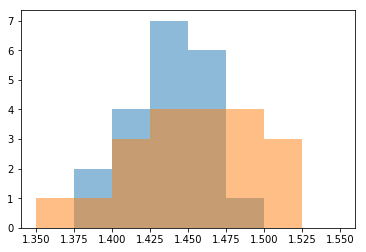

In [66]:
print(np.mean(lastkt,axis=1))
plt.hist(lastkt[0],bins=8,alpha=0.5,range=(1.35,1.55))
plt.hist(lastkt[1],bins=8,alpha=0.5,range=(1.35,1.55))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


df 62


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


df 200


(1.4, 2)

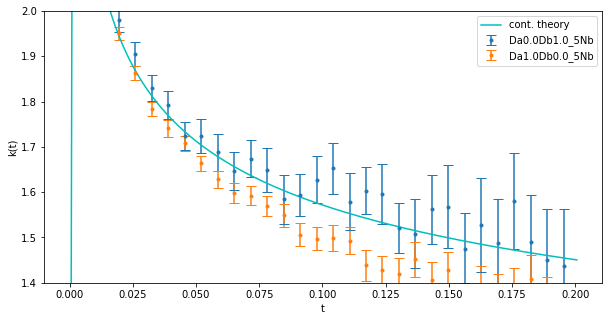

In [33]:
plt.figure(figsize=(10,5))
names=['Da0.0Db1.0_5Nb','Da1.0Db0.0_5Nb']
N=500
kf=100
Area=42.247
lg=5
R=0.01
D=1
ka=kf*D*4*pi
lastkt=[[],[]]
for ii,nm in enumerate(names):
    pattern = '/home/chew/spatiocyte_example/2D/output/newPa_2D_irr_kf100N100L6.5_{}/*'.format(nm)
    FNS = glob.glob(pattern)
    KT=[]
    df = len(FNS)-1
    for name in FNS:
        t,st=np.array(np.loadtxt(name,delimiter=',',skiprows=1)).T
        kt = calk(st,t,N/Area)
        KT.append(kt)
        #plt.plot(t,kt,'.')
        lastkt[ii].append(kt[-3])
    KT=np.array(KT)    
    mkt = np.mean(KT,axis=0)
    print('df',df)
    tscore = stats.t.ppf(1-0.025, df)#Studnt, p<0.05, 2-tail
    std = np.std(KT,axis=0)*tscore/math.sqrt(df)#check correct or not? P=0.05
    plt.errorbar(t[::lg],mkt[::lg],std[::lg],fmt='.',capsize=5,label=nm)
plt.plot(t,funclt(t,ka,R,D),'c-',label='cont. theory')
plt.legend()
plt.ylabel('k(t)')
plt.xlabel('t')
#plt.title('ec3,N={},kf={},L={},trials={}k'.format(423,0.01,6.5,200))
#plt.title('ec3,N={},kf={},L={},trials={}k_Db=0'.format(N,kf,6.5,120))
plt.ylim(1.4,2)


In [15]:
a=factor = (2 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0) + sqrt(22.0))**2/(72 * (6 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0)))            
b=1/2/sqrt(3)
a,b,(a-b)*100/b

(0.28986264423934294, 0.2886751345948129, 0.4113654077608089)